In [68]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [69]:
boston_data=pd.DataFrame(load_boston().data, columns=load_boston().feature_names)

In [70]:
Y = load_boston().target
X = load_boston().data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [71]:
print("X Shape: ",X.shape)
print("Y Shape: ",Y.shape)
print("X_Train Shape: ",x_train.shape)
print("X_Test Shape: ",x_test.shape)
print("Y_Train Shape: ",y_train.shape)
print("Y_Test Shape: ",y_test.shape)

X Shape:  (506, 13)
Y Shape:  (506,)
X_Train Shape:  (354, 13)
X_Test Shape:  (152, 13)
Y_Train Shape:  (354,)
Y_Test Shape:  (152,)


In [72]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# adding the output to the data
train_data = pd.DataFrame(x_train)
train_data["price"] = y_train
train_data.head()
print(train_data.shape)

(354, 14)


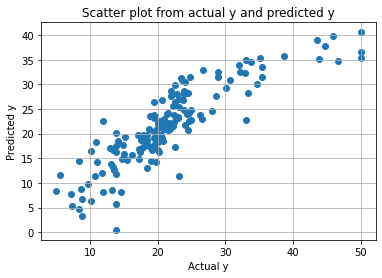

Mean Squared Error : 19.281016734905958


In [14]:
# SkLearn SGD classifier
n_iter=100
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(x_train, y_train)
y_pred_sksgd=clf_.predict(x_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))

In [103]:
def transform_with_bias(data):
    data_with_bias = data
    b = np.ones([data_with_bias.shape[0],1])
    data_with_bias = np.concatenate((b, data_with_bias), axis=1)
    beta = np.zeros([1, X_train_with_bias.shape[1] - 1])
    return data_with_bias, beta
    
X_train_with_bias, beta = transform_with_bias(train_data)
X_test_with_bias, _ = transform_with_bias(x_test)

In [104]:
X_train_with_bias.shape, X_test_with_bias.shape, beta.shape

((354, 15), (152, 14), (1, 14))

### Y = X * beta

In [110]:
np.random.random_sample((5,))

array([0.99469555, 0.88284829, 0.12714852, 0.89508303, 0.36738785])

In [111]:
curr_iter = 0
num_of_iter = 1000
learning_rate = 0.001
k = 10
while curr_iter < num_of_iter:
    
    # we will create a small dataset of size k
    picked_rows = np.random.choice(X_train_with_bias.shape[0]
    temp_x_train = X_train_with_bias[picked_rows, k, replace=False), :]
    
    # separate out the last col as that is the y
    # https://stackoverflow.com/a/47542892
    y = temp_x_train[:, -1]
    x = temp_x_train[:, :-1]
    
    # we keep our initial gradient as zeros
    beta_temp_gradients = np.random.random_sample([1, x.shape[1]])
    
    for i in range(k):
        prediction = np.dot(beta_temp_gradients, x[i])
        beta_temp_gradients = beta_temp_gradients + (-2) * x[i] * (y[i] - prediction)
        
    # updating the weights
    beta = beta - learning_rate * (beta_temp_gradients / k)
    
    # incrementing the current iteration
    curr_iter += 1
    
# prediction = np.dot(X_train_with_bias[0].reshape(-1, 1).T, beta)
# beta = beta + (-2)*X_train_with_bias[0]*(y_train[0]-(prediction))

In [115]:
beta_temp_gradients.shape, x[0].shape

((1, 14), (14,))

In [112]:
beta.shape, X_train_with_bias.shape, X_test_with_bias.shape

((1, 14), (354, 15), (152, 14))

In [113]:
def predict(x_test, beta):
    print(x_test.shape, beta.shape)
    return np.dot(beta, x_test.T)

(152, 14) (1, 14)
(1, 152)


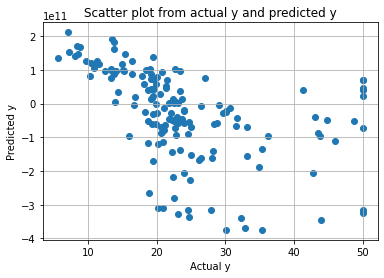

Mean Squared Error : 1.9341823621072723e+22


In [114]:
predictions = predict(X_test_with_bias, beta)
print(predictions.shape)

plt.scatter(y_test, predictions)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test.reshape(1, -1), predictions))